# Credit Risk Resampling Techniques

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split

# Read the CSV into DataFrame

In [3]:
# Load the data
file_path = Path('./Resources/lending_data.csv')
df = pd.read_csv(file_path)
df.head()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,own,52800,0.431818,5,1,22800,low_risk
1,8400.0,6.692,own,43600,0.311927,3,0,13600,low_risk
2,9000.0,6.963,rent,46100,0.349241,3,0,16100,low_risk
3,10700.0,7.664,own,52700,0.430740,5,1,22700,low_risk
4,10800.0,7.698,mortgage,53000,0.433962,5,1,23000,low_risk


# Split the Data into Training and Testing

In [4]:
# Use label encoder to amend categorical data into numerical
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()

df = df.apply(LabelEncoder().fit_transform)
df

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,57,2017,1,221,221,5,1,221,1
1,34,1037,1,129,129,3,0,129,1
2,40,1308,2,154,154,3,0,154,1
3,57,2009,1,220,220,5,1,220,1
4,58,2043,0,223,223,5,1,223,1
...,...,...,...,...,...,...,...,...,...
77531,141,4055,1,529,529,12,2,529,0
77532,127,3565,0,472,472,11,2,472,0
77533,126,3516,2,466,466,11,2,466,0
77534,113,3184,0,416,416,10,2,416,0


In [5]:
# Create our features
X = df.drop(columns="loan_status")

# Create our target
y = df["loan_status"]

In [6]:
X.describe()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,48.055278,1581.013774,0.606144,184.097065,184.097065,3.826610,0.392308,184.097065
std,20.930013,666.346585,0.667811,79.064040,79.064040,1.904426,0.582086,79.064040
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1170.000000,0.000000,141.000000,141.000000,3.000000,0.000000,141.000000
50%,45.000000,1517.000000,1.000000,174.000000,174.000000,4.000000,0.000000,174.000000
75%,54.000000,1873.000000,1.000000,207.000000,207.000000,4.000000,1.000000,207.000000
max,181.000000,4691.000000,2.000000,661.000000,661.000000,16.000000,3.000000,661.000000


In [7]:
# check X data types
X.dtypes

loan_size           int64
interest_rate       int64
homeowner           int32
borrower_income     int64
debt_to_income      int64
num_of_accounts     int64
derogatory_marks    int64
total_debt          int64
dtype: object

In [8]:
# Check the balance of our target values
y.value_counts()

1    75036
0     2500
Name: loan_status, dtype: int64

In [9]:
# Create X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
y_test.value_counts()

1    18765
0      619
Name: loan_status, dtype: int64

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [11]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler = scaler.fit(X_train)

In [13]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Simple Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [15]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9889115309798473

In [16]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  609,    10],
       [  113, 18652]], dtype=int64)

In [17]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.98      0.99      0.91      0.99      0.98       619
          1       1.00      0.99      0.98      1.00      0.99      0.98     18765

avg / total       0.99      0.99      0.98      0.99      0.99      0.98     19384



# Oversampling

In this section, you will compare two oversampling algorithms to determine which algorithm results in the best performance. You will oversample the data using the naive random oversampling algorithm and the SMOTE algorithm. For each algorithm, be sure to complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

### Naive Random Oversampling

In [18]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=1)
X_ros_resampled, y_ros_resampled = ros.fit_resample(X_train, y_train)

# View the count of target classes with Counter
Counter(y_ros_resampled)

Counter({1: 56271, 0: 56271})

In [19]:
# using value_counts() to show size of samples in each class (as y is a dataframe)
y_ros_resampled.value_counts()

1    56271
0    56271
Name: loan_status, dtype: int64

In [20]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

model_ros = LogisticRegression(solver='lbfgs', random_state=1)
model_ros.fit(X_ros_resampled, y_ros_resampled)


LogisticRegression(random_state=1)

In [21]:
y_ros_pred= model_ros.predict(X_test)

In [22]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score, classification_report
classification_report
balanced_accuracy_score(y_test, y_ros_pred)

0.9936781215845847

In [23]:
# Display the confusion matrix

confusion_matrix(y_test, y_ros_pred)

array([[  615,     4],
       [  116, 18649]], dtype=int64)

In [24]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_ros_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.99      0.99      0.91      0.99      0.99       619
          1       1.00      0.99      0.99      1.00      0.99      0.99     18765

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     19384



### SMOTE Oversampling

In [25]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE

X_smote_resampled, y_smote_resampled = SMOTE(random_state=1).fit_resample(X_train, y_train)

# View the count of target classes with Counter
# THIS LOKS WORNG AS WELL - there are no second class items
Counter(y_smote_resampled)

Counter({1: 56271, 0: 56271})

In [26]:
# using value_counts() to show size of samples in each class (as y is a dataframe)
y_smote_resampled.value_counts()

1    56271
0    56271
Name: loan_status, dtype: int64

In [27]:
# Train the Logistic Regression model using the resampled data
model_smote = LogisticRegression(solver='lbfgs',random_state=1)
model_smote.fit(X_smote_resampled, y_smote_resampled)

LogisticRegression(random_state=1)

In [28]:
y_smote_pred = model_smote.predict(X_test)

In [29]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_smote_pred)

0.9928970124923218

In [30]:
# Display the confusion matrix
confusion_matrix(y_test, y_smote_pred)

array([[  614,     5],
       [  115, 18650]], dtype=int64)

In [31]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_smote_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.99      0.99      0.91      0.99      0.99       619
          1       1.00      0.99      0.99      1.00      0.99      0.99     18765

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     19384



# Undersampling

In this section, you will test an undersampling algorithm to determine which algorithm results in the best performance compared to the oversampling algorithms above. You will undersample the data using the Cluster Centroids algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [32]:
# Resample the data using the ClusterCentroids resampler
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=1)
X_cc_resampled, y_cc_resampled = cc.fit_resample(X_train, y_train)

# View the count of target classes with Counter
Counter(y_cc_resampled)

Counter({0: 1881, 1: 1881})

In [33]:
# using value_counts() to show size of samples in each class (as y is a dataframe)
y_cc_resampled.value_counts()

1    1881
0    1881
Name: loan_status, dtype: int64

In [34]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model_cc = LogisticRegression(solver='lbfgs',random_state=1)
model_cc.fit(X_cc_resampled, y_cc_resampled)

LogisticRegression(random_state=1)

In [35]:
y_cc_pred = model_cc.predict(X_test)

In [36]:
# Calculate the balanced accuracy score
balanced_accuracy_score(y_test, y_cc_pred)

0.9921159034000586

In [37]:
# Display the confusion matrix
confusion_matrix(y_test, y_cc_pred)

array([[  613,     6],
       [  114, 18651]], dtype=int64)

In [38]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_cc_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.99      0.99      0.91      0.99      0.98       619
          1       1.00      0.99      0.99      1.00      0.99      0.98     18765

avg / total       0.99      0.99      0.99      0.99      0.99      0.98     19384



# Combination (Over and Under) Sampling

In this section, you will test a combination over- and under-sampling algorithm to determine if the algorithm results in the best performance compared to the other sampling algorithms above. You will resample the data using the SMOTEENN algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [39]:
# Resample the training data with SMOTEENN
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state=1)
X_s_enn_resampled, y_s_enn_resampled = sm.fit_resample(X_train, y_train)

# View the count of target classes with Counter
Counter(y_s_enn_resampled)

Counter({0: 55566, 1: 55900})

In [40]:
# use value_counts() to view the samples in each class, as is a dataframe
y_s_enn_resampled.value_counts()

1    55900
0    55566
Name: loan_status, dtype: int64

In [41]:
# Train the Logistic Regression model using the resampled data
model_s_enn = LogisticRegression(solver='lbfgs', random_state=1)
model_s_enn.fit(X_s_enn_resampled, y_s_enn_resampled)

LogisticRegression(random_state=1)

In [42]:
y_s_enn_pred = model_s_enn.predict(X_test)

In [43]:
# Calculate the balanced accuracy score
balanced_accuracy_score(y_test, y_s_enn_pred)

0.9935981855334257

In [44]:
# Display the confusion matrix
confusion_matrix(y_test, y_s_enn_pred)

array([[  615,     4],
       [  119, 18646]], dtype=int64)

In [45]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_s_enn_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.99      0.99      0.91      0.99      0.99       619
          1       1.00      0.99      0.99      1.00      0.99      0.99     18765

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     19384



# Final Questions

1. Which model had the best balanced accuracy score?

   The Random Over Sampling model had the highest balanced accuracy score of 0.99368, while the SMOTEENN model was the second highest at 0.99360. In fact, all the models which adjust for imbalanced classes had scores above 0.99.
   However, the Balanced Accuracy Score is an average of the recall scores in each class, and doesn't factor in the imbalanced classes in our dataset.

2. Which model had the best recall score?

   All the models which adjust for imbalanced classes (Random Over sampling, SMOTE, Cluster Centroids and SMOTE ENN models) all had similar imbalanced recall scores of 0.99 (for both average and for both classes separately).  The Simple Logistic Regression model had a slightly lower score of 0.98/0.99 for class 0 and class 1.

3. Which model had the best geometric mean score?

    All the models had the same geometric means, of 0.99 average and for each of the classes.
    
The above scores are based on the default probability classification threshold of 0.5.  For a more thorough assessment, it would be good to do a Precision-Recall curve and compare the area under the curve (AUPRC) to determine which model is best across all probability classification thresholds.


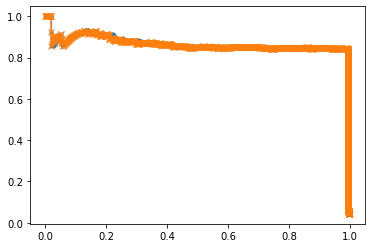

In [83]:
# Comparing the Precision-Recall Curves (here, we will compare the SMOTE model, with SMOTE ENN)
from sklearn.metrics import precision_recall_curve

probs_smote = model_smote.predict_proba(X_test)[:, 1]
probs_se = model_s_enn.predict_proba(X_test)[:, 1]
precision_smote, recall_smote, _ = precision_recall_curve(y_test, probs_smote, pos_label=1)
precision_se, recall_se, _ = precision_recall_curve(y_test, probs_se, pos_label=1)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(recall_smote, precision_smote, marker='.')
plt.plot(recall_se, precision_se, marker='x')

In [85]:
# To calculate the area under the curve (AUPRC)
from sklearn.metrics import auc, plot_precision_recall_curve
auc_smote = auc(recall_smote, precision_smote)
print(auc_smote)

auc_se = auc(recall_se, precision_se)
print(auc_se)


0.862900861912703
0.8623236078170853


### Here, the SMOTE model has a marginally higher AUPRC, which means it has an overall higher AUPRC vs SMOTE ENN.